#*Please upload files and images from "to_upload" folder before running all cells*
#*Please enter Ctrl+F9 to run all cells*


# **Maryland Census Data Visualization and Analysis**
### BTEC362 Group Project
### Prof. Gary Thai
### Biotechies Group Members: Nhi Luu, Anastasiya Golikova, Maryam Abdur-Rahman, Madji Lodoumgoto, Sharifa Yar, Lloyd Jones



In [ ]:
#@title ####Import modules and packages { run: "auto" }
##-- Import modules and packages:
!pip install geopandas
!pip install newspaper3k
!pip install textstat


# For general python dataFrame manipulation, aggregations, and plots.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import display
from PIL import Image
import plotly.express as px 
import geopandas as gpd
import re
from bs4 import BeautifulSoup
import urllib.request
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import newspaper
from newspaper import Article
import nltk
nltk.download('stopwords')
nltk.download('punkt')
%matplotlib inline
import spacy
import textstat

# For handling API calls.
import requests
from urllib.request import urlretrieve
import urllib.parse, urllib.error, json
from requests.models import Response
import pprint
from pprint import PrettyPrinter

# For user-friendly data file access.
import os
import shutil
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 34.8 MB/s 
     |████████████████████████████████| 16.6 MB 64.6 MB/s 
     |████████████████████████████████| 7.8 MB 64.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 31.1 MB/s 
     |████████████████████████████████| 7.4 MB 50.2 MB/s 
     |████████████████████████████████| 93 kB 2.4 MB/s 
     |████████████████████████████████| 81 kB 8.7 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=5a304b46d71f2025382ea26786762596bf69735a1481082bbb30debf2c405369
  Stored in directory: /root/.cache/pip/wheels/99/74/83/8fac1c8d9c648cfabebbbffe97a889f6624817f3aa0bbe6c09
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3354 sha256=cca78b38871d592e674ac330c385323d0b51

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
#@title ####Education (Nhi) { run: "auto" }
def Nhi_group_proj():
    """This is code snippets for Nhi's part: Education"""
    ##------------------------------------------------------------------------------------------------##

    ##-- API Processing

    api_key = "Sv2wwFY6pTbl3e5daDnbE7mQFhsxdg5njSWB5cgS"
    base_url = "https://api.data.gov/ed/collegescorecard/v1/schools?"

    pp = PrettyPrinter(indent=4)

    url = f"{base_url}api_key={api_key}&fields="

    # List of all the search conditions
    parameters = ["&school.state=MD",
                "&school.operating=1",
                "&school.ownership=1"
                ]

    # Appending all the conditions values to construct the conditionss_url
    parameters_url = ""
    for parameter in parameters:
        parameters_url = parameters_url + parameter


    # Dictionary all the desired fields
    year = "latest"
    fields = {
            # School Category
            "School Name": "school.name",
            "School ID": "id",
            "School State": "school.state",

            # Student Enrollment Category
            "Student Enrollment Size": year + ".student.size",
            "Male Students (%)": year + ".student.demographics.men",
            "Female Students (%)": year + ".student.demographics.women",
            # Age
            "Average age of entry": year + ".student.demographics.age_entry",
            # College enrollments degree-seeking by ethnicity
            "White": year + ".student.demographics.race_ethnicity.white",
            "Asian": year + ".student.demographics.race_ethnicity.asian",
            "Black": year + ".student.demographics.race_ethnicity.black",
            "Hispanic": year + ".student.demographics.race_ethnicity.hispanic",

            # Percentage of degrees awarded in STEM
            "Agriculture": year + ".academics.program_percentage.agriculture",
            "Resources": year + ".academics.program_percentage.resources",
            "Architecture": year + ".academics.program_percentage.architecture",
            "Communication": year + ".academics.program_percentage.communication",
            "Comm_tech": year + ".academics.program_percentage.communications_technology",
            "Computer": year + ".academics.program_percentage.computer",
            "Education": year + ".academics.program_percentage.education",
            "Engineering": year + ".academics.program_percentage.engineering",
            "E_tech": year + ".academics.program_percentage.engineering_technology",
            "Biological": year + ".academics.program_percentage.biological",
            "Mathematics": year + ".academics.program_percentage.mathematics",
            "Military": year + ".academics.program_percentage.military",
            "Multidiscipline": year + ".academics.program_percentage.multidiscipline",
            "Phys_sci": year + ".academics.program_percentage.physical_science",
            "Sci_tech": year + ".academics.program_percentage.science_technology",
            "Psychology": year + ".academics.program_percentage.psychology",
            "Law": year + ".academics.program_percentage.security_law_enforcement",
            "Social_sci": year + ".academics.program_percentage.social_science",
            "Transportation": year + ".academics.program_percentage.transportation",
            "Health": year + ".academics.program_percentage.health",
            "Bussiness_analyst": year + ".academics.program_percentage.business_marketing",

            #Cost Category
            "Attendance Cost per Academic Year": year + ".cost.attendance.academic_year",

            # Completion Category
            "150% Completion Rate at 4Yr (%)": year + ".completion.completion_rate_4yr_150nt",

            # Admissions Category 
            "Admission Rate (%)": year + ".admissions.admission_rate.overall",

            # Earnings Category
            # 6 Years after Enrollment:
            "Mean Earnings (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings",
            "Mean Male Earnings (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.male_students",
            "Mean Female Earnings (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.female_students",
            }

    # Appending all the fields values to construct the fields_url
    fields_url = ""
    for key, val in fields.items():
        fields_url = fields_url + val + ","

    # To remove the extra "," at the end of fields_url
    fields_url = fields_url[:-1]

    # Getting number of records returned to set the max page number
    query_url = f"{url}{fields_url}{parameters_url}&_per_page=100"
    response = requests.get(query_url).json()

    # Constructing the dataframe from the API request response

    #Initializing variables
    school_df = []
    per_page = 100

    for page_num in range(0,1):
        query_url = f"{url}{fields_url}{parameters_url}&page={page_num}&_per_page={per_page}"
        response = requests.get(query_url).json()
        
        #print(response)
        for x in range(len(response["results"])):
            result_row = {}
            
            for key, val in fields.items(): 
                try:
                    result_row[key] = response["results"][x][val]
                except KeyError:
                    print(f"{key} key not found")
                    
            school_df.append(result_row)

    school_df = pd.DataFrame(school_df)

    # school_df

    ##------------------------------------------------------------------------------------------------##

    ##-- Counties map
    county_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_county_5m.zip")
    county_df = county_df.query("STATEFP == '24'")
    # county_df
    county_fig = px.choropleth(county_df,
                    geojson=county_df.geometry,
                    locations=county_df.index,
                    color="NAME")

    county_fig.update_geos(fitbounds="locations", visible=False)
    county_fig.update_layout(title_text="Maryland Counties")

    county_fig.show()

    ##------------------------------------------------------------------------------------------------##

    ##-- Word Cloud

    wc_df = school_df[['School Name',"Student Enrollment Size"]].copy()
    wc_df["Student Enrollment Size"]= wc_df["Student Enrollment Size"].fillna(0)
    # wc_df

    # Generate image
    state_mask = np.array(Image.open('MD_state.png'))    

    school_dict = dict(zip(wc_df['School Name'].tolist(), wc_df['Student Enrollment Size'].tolist()))

    wc = WordCloud(max_font_size=100,
                scale=3, background_color="white",
                    mask=state_mask,contour_width=3, contour_color='sienna').generate_from_frequencies(school_dict)
    plt.figure(figsize=[20, 10])
    plt.tight_layout(pad=0)
    plt.title('Maryland Public Colleges Word Cloud by Enrollments',size=20,x=0.3,y=0.05,
            fontweight=15)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

    ##------------------------------------------------------------------------------------------------##

    ##--clean up school_df
    school_df=school_df.dropna()
    school_df=school_df.loc[:, (school_df != 0).any(axis=0)]
    school_df.to_csv('school_df.csv',index=False)
    # school_df


    ##------------------------------------------------------------------------------------------------##

    ##--Sub dataframe for student enrollments
    enrollment_df = school_df[["School ID","School Name","School State","Student Enrollment Size",
                            "Male Students (%)","Female Students (%)", "Average age of entry", 
                            "White","Asian","Black","Hispanic"
                                    ]].copy()

    #Convert to percentage %
    enrollment_df[enrollment_df.loc[:, ~enrollment_df.columns.isin(['School ID', 'Student Enrollment Size','Average age of entry'])].select_dtypes(include=['number']).columns] *= 100
    pd.options.display.float_format = '{:.2f}'.format

    enrollment_df = enrollment_df.sort_values(by=['Student Enrollment Size'],ascending=False)
    # enrollment_df
    # enrollment_df[['Student Enrollment Size','Male Students (%)','Female Students (%)','Average age of entry','White','Asian','Black','Hispanic']].describe()



    ##------------------------------------------------------------------------------------------------##

    ##--Enrollments in MD Colleges
    fig = px.bar(enrollment_df, x="School Name",
                y="Student Enrollment Size",
                title="Enrollments in MD Colleges")
    fig.update_layout(
        xaxis_title="School Names",
        yaxis_title="Student Enrollments")
    fig.show()


    ##------------------------------------------------------------------------------------------------##

    ##--Average Age
    fig = px.bar(enrollment_df, x="School Name",
                y="Average age of entry",
                title="Average Age of Entry in MD Colleges")
    fig.update_layout(
        xaxis_title="School Names",
        yaxis_title="Age")
    fig.show()



    ##------------------------------------------------------------------------------------------------##

    ##--Gender
    fig = px.bar(enrollment_df, x="School Name",
                y=['Female Students (%)', 'Male Students (%)'],
                title="Percentage of Male and Female Students in MD Colleges")
    fig.update_layout(
        xaxis_title="School Names",
        yaxis_title="Percentage (%)",
        legend_title="Gender")
    fig.show()



    ##------------------------------------------------------------------------------------------------##

    ##--Ethnicities
    fig = px.bar(enrollment_df, x="School Name",
                y=["White", "Asian", "Black", "Hispanic"],
                title="Ethnic Diversity in Maryland Public Colleges")
    fig.update_layout(
        xaxis_title="School Names",
        yaxis_title="Percentage (%)",
        legend_title="Ethnicities")
    fig.show()



    ##------------------------------------------------------------------------------------------------##

    ##--Sub dataframe for STEM degrees
    stem_df = school_df[["School ID","School Name","School State","Student Enrollment Size",
                        "Agriculture","Resources","Architecture","Communication",
                        "Comm_tech","Computer","Education","Engineering","E_tech",
                        "Biological","Mathematics","Multidiscipline","Phys_sci",
                        "Psychology","Law","Social_sci", "Transportation","Health","Bussiness_analyst"
                                    ]].copy()

    #Convert to percentage %

    #For single column
    # stem_df[stem_df.loc[ : , stem_df.columns != 'School ID'].select_dtypes(include=['number']).columns] *= 100

    #For multiple columns
    stem_df[stem_df.loc[:, ~stem_df.columns.isin(['School ID', 'Student Enrollment Size'])].select_dtypes(include=['number']).columns] *= 100


    pd.options.display.float_format = '{:.2f}'.format

    stem_df = stem_df.sort_values(by=['Student Enrollment Size'],ascending=False)
    # stem_df



    ##------------------------------------------------------------------------------------------------##

    ##--Stem degrees graph
    fig = px.bar(stem_df, x="School Name",
                y=["Agriculture","Resources","Architecture","Communication",
                        "Comm_tech","Computer","Education","Engineering","E_tech",
                        "Biological","Mathematics","Multidiscipline","Phys_sci",
                        "Psychology","Law","Social_sci", "Transportation","Health","Bussiness_analyst"],
                title="Percentages of STEM degrees awarded in MD Colleges")
    fig.update_layout(
        xaxis_title="School Names",
        yaxis_title="Percentage (%)",
        legend_title="Stem Degrees")
    fig.show()



    ##------------------------------------------------------------------------------------------------##

    ##--Sub dataframe for student enrollments
    correlation_df = school_df[['School Name', 'School ID', 'School State', 'Student Enrollment Size',
        'Male Students (%)', 'Female Students (%)', 'Average age of entry',
        'White', 'Asian', 'Black', 'Hispanic','Attendance Cost per Academic Year',
        '150% Completion Rate at 4Yr (%)', 'Admission Rate (%)',
        'Mean Earnings (6 Yrs after Entry)',
        'Mean Male Earnings (6 Yrs after Entry)',
        'Mean Female Earnings (6 Yrs after Entry)'
                                    ]].copy()

    # correlation_df

    ##------------------------------------------------------------------------------------------------##

    ##--Correlation graph
    fig = px.scatter(correlation_df, x="Mean Earnings (6 Yrs after Entry)", y="150% Completion Rate at 4Yr (%)", trendline='ols', hover_data=['School Name'])
    fig.update_layout(
        xaxis_title="Mean Earnings (6 Yrs after Entry)",
        yaxis_title="150% Completion Rate at 4Yr (%)",
        legend_title="Mean Earnings vs Completion Rate at 4Yr College")
    fig.show()



In [ ]:
#@title ####Housing (Madji)

def Madji_group_proj():
    #Percentage of Housing Types
    # Creating dataset
    housingtypes = ['66% Single Family Homes', '14%TownHomes', '2%Boats/RVs/Tents/Caves',
            '6% Other Facilities', '12% Condos/Co-ops', '1% Structured Living Places']
    
    housingnumbers = [64,14,2 , 6, 12, 1]
    
    # Creating plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(housingnumbers, labels = housingtypes)
    
    # show plot
    plt.show()

    ##------------------------------------------------------------------------------------------------##
    #Average Rent Prices for a One bed room unit
    df_rent=pd.read_excel('Maryland Market Rent2020.xlsx')
 
    # df_rent

    plt.bar(x=df_rent['County'],
    
            height=df_rent['1 BR'])
    plt.xticks(rotation= 75, fontsize = 8)
    plt.yticks(fontsize = 18)
    plt.title('Average Rent Prices for 1Bedroom Unit', fontsize= 20, fontweight ='bold')
    plt.xlabel('Counties')
    plt.ylabel('Price in Dollars')
    plt.show()

    ##------------------------------------------------------------------------------------------------##
    ## New homes built in 2020
    df_rentt=pd.read_excel('NewHousingUnitsApproved2020.xlsx')
    
    # df_rentt

    plt.bar(x=df_rentt['County'],
    
            height=df_rentt['Houses Built'],
            color = '#2e9e98')
    plt.xticks(rotation= 75, fontsize = 8)
    plt.yticks(fontsize = 18)
    plt.title('New Homes Built in 2020', fontsize= 20, fontweight ='bold')
    plt.xlabel('Counties')
    plt.ylabel('Number of Homes Built')
    plt.show()

In [ ]:
#@title ####Ethnicities (Lloyd)
def Lloyd_group_proj():
    ##-- Beautiful Soup
    myurl1 = 'https://en.wikipedia.org/wiki/List_of_counties_in_Maryland#:~:text=The%20Federal%20Information%20Processing%20Standard,would%20be%20written%20as%2024XXX.'
    page1 = urllib.request.urlopen(myurl1)
    soup1 = BeautifulSoup(page1, 'html.parser')

    ##------------------------------------------------------------------------------------------------##

    ##-- API Processing
    key = '2f81c9fbef4648267d66ea2148eac82eb05fba87'
    url = f'https://api.census.gov/data/2019/pep/charagegroups?get=POP,RACE&for=county:*&in=state:*&key={key}'
    response = requests.get(url)

    base = response.text
    rebase = re.findall('\[[^\]]*\]',base)
    rebase[1].split(',')[0]
    pop = ['none'] * len(rebase)
    race = ['none'] * len(rebase)
    state = ['none'] * len(rebase)
    county = ['none'] * len(rebase)
    for x in range(len(rebase)):
        pop[x] = rebase[x].split(',')[0]
        race[x] = rebase[x].split(',')[1]
        state[x] = rebase[x].split(',')[2]
        county[x] = rebase[x].split(',')[3]
    for x in range(len(rebase)):
        pop[x] = re.sub('[\["\]]','',pop[x])
        race[x] = re.sub('[\["\]]','',race[x])
        state[x] = re.sub('[\["\]]','',state[x])
        county[x] = re.sub('[\["\]]','',county[x])

    ##------------------------------------------------------------------------------------------------##

    ##-- Creating dataframe
    df = pd.DataFrame(county, columns=['County'])
    df['State'] = state
    df['Race'] = race
    df['Population Size'] = pop
    df = df.drop(0)

    #-- Copy
    maryland = df.loc[df['State'] == '24'].copy()
    maryland.State = 'MD'
    maryland = maryland.sort_values('County')

    ##------------------------------------------------------------------------------------------------##

    ##-- Data Processing
    # regex and list manipulation
    list1 = []
    for a in soup1.findAll('a'):
        list1.append(a.getText('href').split('\n')[0])
    counties = []
    for x in range(len(list1)):
        counties.append(re.findall('.+County$', list1[x]))
    counties
    null = []
    while(null in counties):
        counties.remove(null)
    counties[1][0]
    clist = []
    for x in range(len(counties)):
        clist.append(counties[x][0])
    clist = list(set(clist))
    clist.sort()
    clist.insert(3, 'Baltimore City')
    clist

    nlist = maryland.County
    nlist = list(set(nlist))
    nlist.sort()
    nlist.insert(3,'510')
    nlist.pop(-1)
    nlist.insert(-6,'039')
    nlist.pop(-5)
    nlist


    cdict = dict()
    for x in range(len(nlist)):
        cdict[nlist[x]] = clist[x]

    # value replacements 
    maryland = maryland.reset_index(drop=True)
    for x in range(len(maryland.County)):
        maryland.County[x] = cdict[maryland.County[x]]
    # maryland

    maryland = maryland[maryland.Race != '0']
    maryland = maryland[maryland.Race != '7']
    maryland = maryland[maryland.Race != '8']
    maryland = maryland[maryland.Race != '9']
    maryland = maryland[maryland.Race != '10']
    maryland = maryland[maryland.Race != '11']

    rdict = {
        '1' : 'White',
        '2' : 'Black',
        '3' : 'Native American or Alaskan',
        '4' : 'Asian',
        '5' : 'Native Hawaiian or Pacific Islander',
        '6' : 'Two or more Races'
    }

    maryland = maryland.reset_index(drop=True)
    maryland[maryland.County == 'Montgomery County']

    for x in range(len(maryland.Race)):
        maryland.Race[x] = rdict[maryland.Race[x]]
    # maryland
    ##------------------------------------------------------------------------------------------------##

    ##-- Word cloud()
    words = ' '.join(list1)
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");
    wc= WordCloud(width= 1000, height = 500, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(words)
    plot_cloud(wc)
    time.sleep(2)

    ##------------------------------------------------------------------------------------------------##

    ##-- Figures

    fig = px.histogram(maryland, x= 'County', y= 'Population Size', color='Race', title='County racial demographics bar graph', barmode='group',width=1000,height=1000)
    fig.show()

    bMajority = maryland[maryland.County == "Prince George's County"]
    bMajority = bMajority.append(maryland[maryland.County == 'Baltimore City'])

    fig1 = px.histogram(bMajority, x= 'County', y= 'Population Size', color='Race', title='Most Unique County racial demographics bar graph', barmode='group',width=1000,height=1000)
    fig1.show()

    fig2 = px.pie(bMajority[bMajority.County == "Prince George's County"],  values= 'Population Size', names='Race', title="Prince George's County racial demographics Pie Chart",width=1000,height=1000)
    fig2.show()

    fig3 = px.pie(bMajority[bMajority.County == "Baltimore City"],  values= 'Population Size', names='Race', title="Baltimore City racial demographics Pie Chart",width=1000,height=1000)
    fig3.show()

In [ ]:
#@title ####Age (Sharifa)
def Sharifa_group_proj():
    ##------------------------------------------------------------------------------------------------##
    ## what are the total of all age ranges in year 2020 in MD?
    API_KEY = "1vy987fr0us6mfy8io39hvd2t"
    SECRET_CODE = "wv2m7gehprdnlvhbqcfy3wg9uafay91lpesryn81tpxuom67k"
    pp = PrettyPrinter()

    headers = {
        'Content-Type': 'application/x-www-form-urlencoded',
    }

    data = 'grant_type=client_credentials&client_id='+ API_KEY

    response = requests.post('https://opendata.maryland.gov/resource/5zc8-s5s9.json?year=2020', headers=headers, data=data).json()

    my_token_type = response.get('token_type')
    my_access_token = response.get('access_token')


    ## question 1, what are the total of all age ranges in year 2020 in Maryland? - sharifa yar
    url = "https://opendata.maryland.gov/resource/5zc8-s5s9.json?year=2020&category=Total&jurisdiction=State of Maryland"
    r = requests.get(url, headers=headers)
    json = r.json()
    print(json)

    ##------------------------------------------------------------------------------------------------##
    ## bar graph showing the number of 65-69 year olds in diff demographics - sharifa yar
    ## how many 60-69 year olds are there? (shown in total on graph) - sharifa yar

    openFile = pd.read_csv('Total_Population_Projections_by_Age__Sex_and_Race.csv')
    openFile
    plt.bar(x=openFile['Category'],
            height=openFile['65-69'])
    plt.xticks(rotation = 75, fontsize = 10)
    plt.yticks(fontsize = 12)
    plt.title(' Population of 65-69 year-olds')
    plt.xlabel('Different Demographics')
    plt.ylabel('Number of People')

    plt.show()

    ##------------------------------------------------------------------------------------------------##
    ## pie chart - sharifa yar
    ##  what are the percentage of males in 2020 in state of maryland from 0-64 years - sharifa yar

    dataset = ['6.2% 0-4 year olds', '6.2% 5-9 year olds','6.6% 10-14 year olds','6.8% 15-19 year olds', '5.5% 20-24 year olds', '7.1% 25-29 year olds', '7.2% 30-34 year olds', '6.9% 35-39 year olds', '6.2% 40-44 year olds', '6.1% 45-49 year olds', '6.6% 50-54 year olds', '7.1% 55-59 year olds', '6.4% 60-64 year olds']
    agenumbers = [6.2, 6.2, 6.6, 6.8, 5.5, 7.1, 7.2, 6.9, 6.2, 6.1, 6.6, 7.1, 6.4]
    # creating plot - sharifa yar
    fig = plt.figure(figsize=(10, 7))
    plt.pie(agenumbers, labels = dataset)
    plt.title(' Percentage of males in age range of 0-64 years old')
    plt.show()

    ##------------------------------------------------------------------------------------------------##
    ## what is the total number of hispanics in age range 35-49 - sharifa yar
    # creating dataset - sharifa yar
    data = {'35-39':57754, '40-44':53480, '45-49':44097}
    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))

    # creating bar plot - sharifa yar
    plt.bar(courses, values, color ='maroon',
            width = 0.4)

    plt.xlabel("Age Ranges")
    plt.ylabel("Number of People")
    plt.title("Number of hispanics in age range 35-49 years")
    plt.show()

    ##------------------------------------------------------------------------------------------------##
    ## using wordcloud to visualize the most commonly used categories in dataset - sharifa yar
    openFile = open('Total_Population_Projections_by_Age__Sex_and_Race.csv').read()
    wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(openFile)

    cloud = WordCloud().generate(openFile)
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()
    time.sleep(2)

In [ ]:
#@title #### Population (Maryam)
def Maryam_group_proj():
    ##------------------------------------------------------------------------------------------------##
    #question 1 - What were the most populated counties in Maryland in 2018?
    #api call 
    url ='https://opendata.maryland.gov/resource/pa7d-u6hs.json'
    r = requests.get(url)

    #json processing 
    data = r.json()
    s = json.dumps(data)
    s = json.loads(s)

    #conver to dataframe 
    df = pd.DataFrame(s)

    #cleanup dataframe 
    df1 = df[["county","total_pop_current"]]
    df1 = df1[:-4]

    #convert to numeric values
    df1['total_pop_current'] = pd.to_numeric(df1['total_pop_current'])

    #plot horizontal bar chart 
    df1.sort_values('total_pop_current', inplace = True)
    df1.plot.barh(figsize=(20,10),x='county', y='total_pop_current', color='green')
    plt.ylabel("County", size=15)
    plt.xlabel("Population", size=15)
    plt.title("Population of Maryland Counties", size=18)
    plt.show()

    ##------------------------------------------------------------------------------------------------##
    #download article
    baltimore_sun = Article("https://www.baltimoresun.com/maryland/bs-md-census-maryland-population-20210426-ujnhtb3hs5dctaad7iu4padjg4-story.html")
    baltimore_sun.download()
    baltimore_sun.parse()
    baltimore_sun.nlp()

    text = baltimore_sun.text
    text = text.replace("Advertisement", "")
    text = text.replace("\n", " ")

    #wordcloud generation
    common_words =['U', 'S'] + list(STOPWORDS)
    cloud = WordCloud(background_color = 'black', stopwords = common_words, height = 500, width = 1000)
    cloud.generate(text)

    plt.imshow(cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

    ##------------------------------------------------------------------------------------------------##
    #question 3 - What are the number of births across Maryland counties from 2010-2020?
    #excel to dataframe 
    xl = pd.read_excel("Number_of_births_per_county.xlsx")
    xl = xl.drop(range(0,7))
    xl = xl.drop([13,14,18,19,23,24,28])
    xl = xl.drop([29,35,36,41,42,43])

    #exclude years
    xl = xl.drop('Unnamed: 1', axis=1)  
    xl = xl.drop('Unnamed: 12', axis=1) 

    #rename with years
    xl = xl.rename(columns={'Unnamed: 0':'County','Unnamed: 2': '2010-2011','Unnamed: 3': '2011-2012','Unnamed: 4': '2012-2013','Unnamed: 5': '2013-2014','Unnamed: 6': '2014-2015','Unnamed: 7': '2015-2016','Unnamed: 8': '2016-2017','Unnamed: 9': '2017-2018','Unnamed: 10': '2018-2019','Unnamed: 11': '2019-2020'})

    #set index and transpose 
    xl = xl.set_index('County')
    xl2 = xl.transpose()

    #plot figure 
    xl2.plot(figsize=(15,10), marker='o', linewidth = 2, title = 'Maryland Counties - Births From 2010 to 2020', )
    plt.xlabel('Year')
    plt.ylabel('Number of Births')
    plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left')
    plt.show()


In [ ]:
#@title ####Employment (Ana)

def Ana_group_proj():

    ##------------------------------------------------------------------------------------------------##
    #question 1 - How many people are employed in various STEM-related fields in MD?
    ax = plt.figure(figsize=(10,6), facecolor="lightyellow").add_subplot(111)
    plt.title("Current Employment Statistics (CES) in STEM-related fields", fontsize=15)
    plt.bar(x=[1,2,3], height=[2.7,3.65,5.23], width=0.5)
    plt.xticks(ticks=[1,2,3], labels=['Professional, Scientific, and Technical Services','Health Care and Social Assistance','Government (Federal)'], rotation="10", fontsize=12)
    plt.yticks(ticks=np.arange(10), fontsize=12)
    plt.xlabel("General Occupation Title", fontsize=14)
    plt.ylabel("Total estimates of employment (in hundreds)", fontsize=14)
    plt.grid(which='both')
    ax.text(2.5, 8, 'September 2022', style='oblique', fontsize=12,
            bbox={'facecolor': 'navy', 'alpha': 0.5, 'pad': 5})
    plt.show()

    #------------------------------------------------------------------------------------------------##
    #question 2 - What are the most stand-out career fields and occupation in the Life, 
    # Physical, and Social Sciences in Montgomery County?
    freq_words = []
    fname = "WordCloud.txt"
    fhand = open(fname)
    num_words = 0
    from collections import Counter
    with open(fname) as file:
        count = Counter(word for line in file for word in line.split())
    curr_word_count = 0
    for letter, count in count.most_common(30):
    #take away filler words like "and"
        if letter != "a" and letter != "an" and letter != "and" and letter != "the" and curr_word_count < 10:
        #print('%s: %d' % (letter, count))
            freq_words.append(letter)
            curr_word_count += 1

    print("Word Cloud")
    cloud_dict = Counter(freq_words)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(cloud_dict)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    #------------------------------------------------------------------------------------------------##
    #question 3 - Number of Employees in Scientific Research and Development year 2020-2022
    #Maryland
    #Silver Spring-Frederick-Rockville, MD Metropolitan Division
    #Scientific Research and Development Services
    #All Employees, In Thousands

    # num_employees = []
    # avg_2020 = 0
    # avg_2021 = 0
    # avg_2022 = 0
    # count_2020 = 0
    # count_2021 = 0
    # count_2022 = 0
    # data = json.dumps({"seriesid": ['SMU24435246054170001'],"startyear":"2020", "endyear":"2022"})
    # p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    # json_data = json.loads(p.text)
    # for series in json_data['Results']['series']:
    #     x=prettytable.PrettyTable(["series id","year","period","value"])
    #     seriesId = series['seriesID']
    #     for item in series['data']:
    #         year = item['year']
    #         period = item['period']
    #         value = item['value']
    #         if year == '2020':
    #           count_2020 += 1
    #           avg_2020 += float(value)
    #         if year == '2021':
    #           count_2021 += 1
    #           avg_2021 += float(value)
    #         if year == '2022':
    #           count_2022 += 1
    #           avg_2022 += float(value)
    #         if 'M01' <= period <= 'M12':
    #             x.add_row([seriesId,year,period,value,])
    #     output = open(seriesId + '.txt','w')
    #     num_employees.append(avg_2020 /count_2020)
    #     num_employees.append(avg_2021 /count_2021)
    #     num_employees.append(avg_2022 /count_2022)

    #     output.write (x.get_string())
    #     output.close()

    # import plotly
    # import pandas as pd
    # dataframe = pd.DataFrame({'Year': ['2022', '2021', '2020'],
    #                           'num_employees': [avg_2020 /count_2020, 
    #                                             avg_2021 /count_2021, 
    #                                             avg_2022 /count_2022]})
    
    # dataframe.groupby(['Year']).sum().plot(kind='pie', y='num_employees')

    #------------------------------------------------------------------------------------------------##
    #question 4 - What are all of the various careers in the life sciences on the census bureau?
    df = pd.read_csv('EmploymentQ1.csv')

    x = df['Ocupation Name']
    y = df['Employment']
    plt.bar(x,y)
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
#@title ####Setting up main function { run: "auto" }
def main_function():
    print("Maryland Census: Education")
    Nhi_group_proj()
    print("\n---------------------------------------------------\n")
    print("Maryland Census: Housing")
    Madji_group_proj()
    print("\n---------------------------------------------------\n")
    print("Maryland Census: Age")
    Sharifa_group_proj()
    print("\n---------------------------------------------------\n")
    print("Maryland Census: Population")
    Maryam_group_proj()
    print("\n---------------------------------------------------\n")
    print("Maryland Census: Employment")
    Ana_group_proj()
    print("\n---------------------------------------------------\n")
    print("Maryland Census: Ethnicities")
    Lloyd_group_proj()
    


Maryland Census: Education


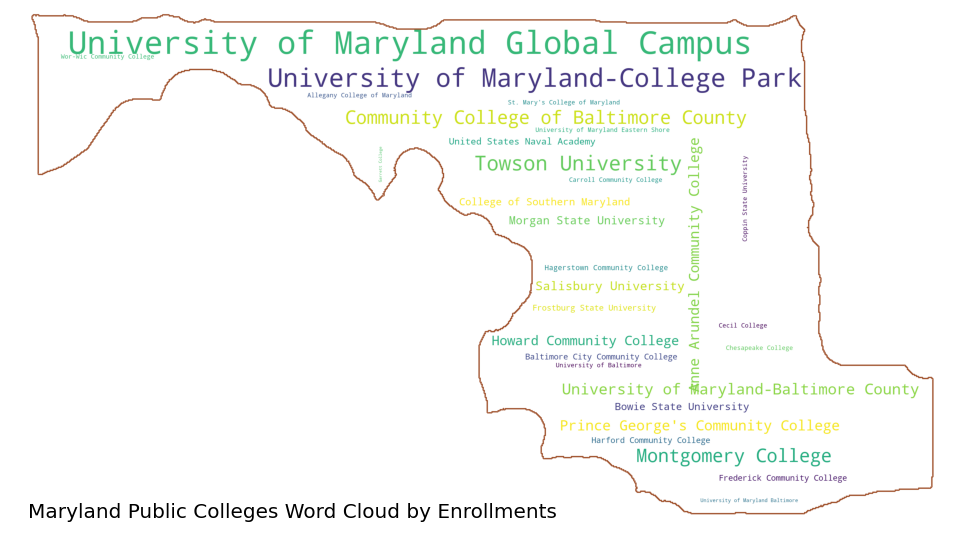


---------------------------------------------------

Maryland Census: Housing


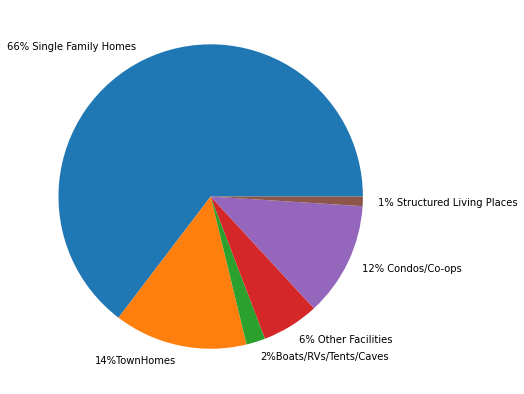

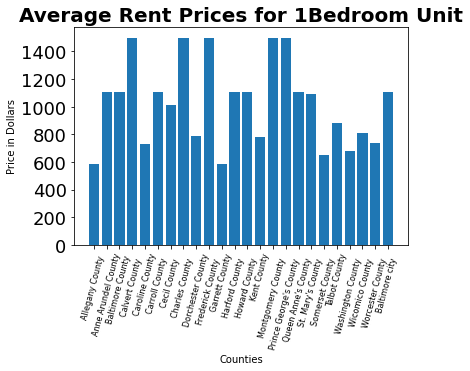

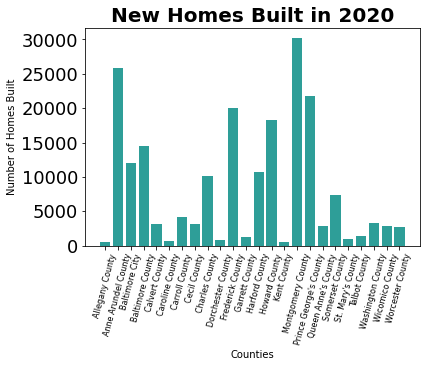


---------------------------------------------------

Maryland Census: Age
[{'jurisdiction': 'State of Maryland', 'year': '2020', 'category': 'Total', '_0_4': '365406', '_5_9': '361901', '_10_14': '382711', '_15_19': '395706', '_20_24': '378407', '_25_29': '422436', '_30_34': '430470', '_35_39': '414137', '_40_44': '377585', '_45_49': '377209', '_50_54': '409913', '_55_59': '441635', '_60_64': '401620', '_65_69': '324458', '_70_74': '256163', '_75_79': '171835', '_80_84': '106729', '_85': '123487', 'total': '6141808'}]


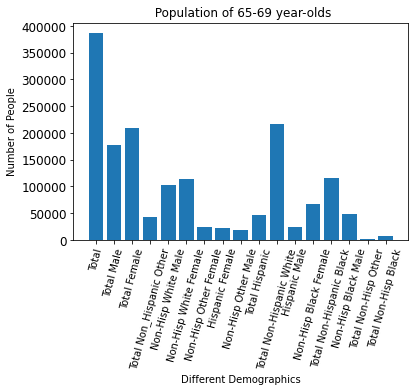

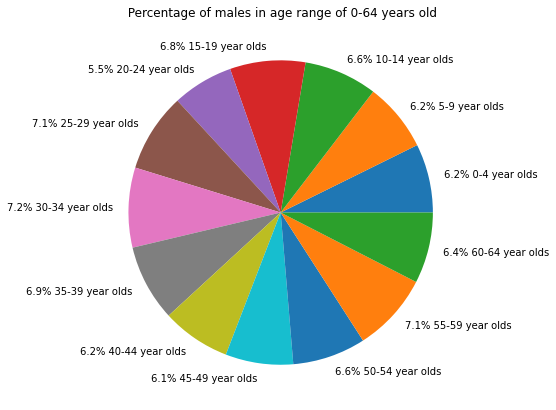

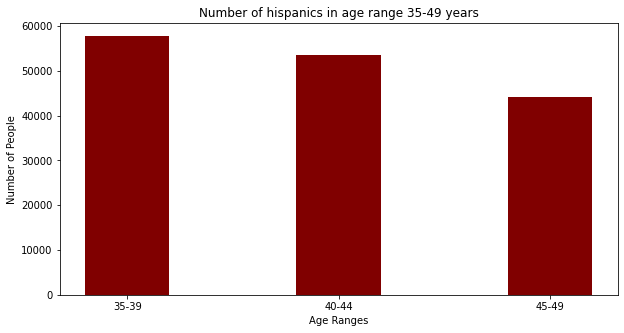

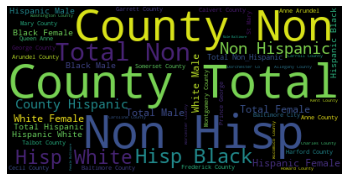


---------------------------------------------------

Maryland Census: Population


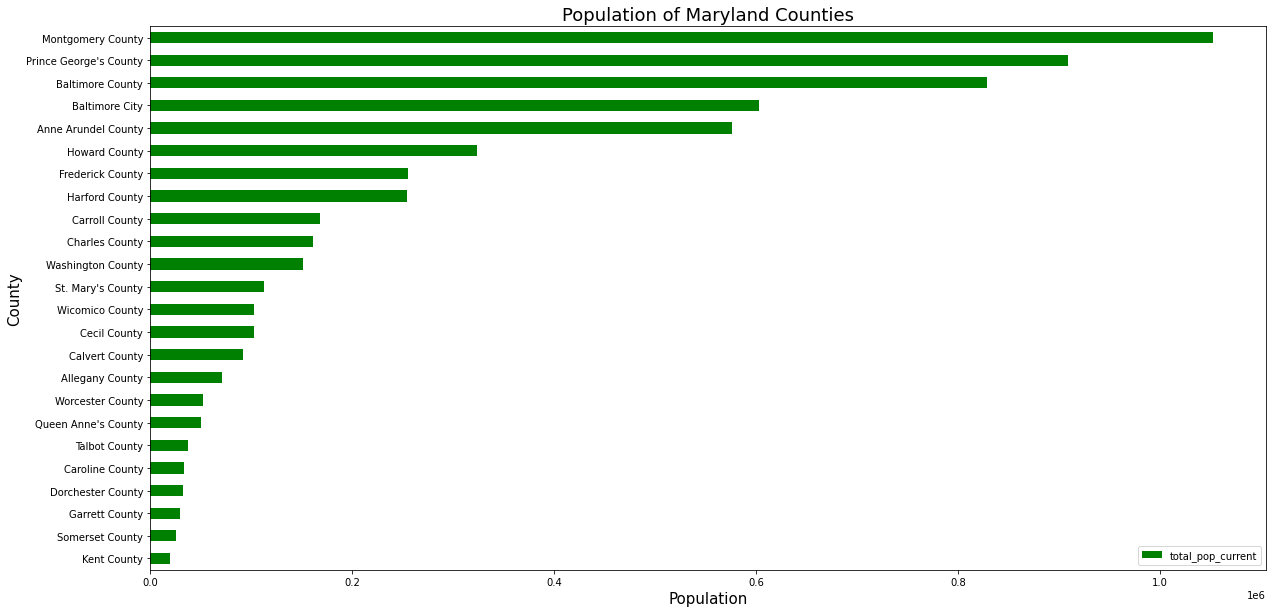

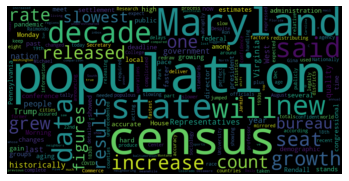

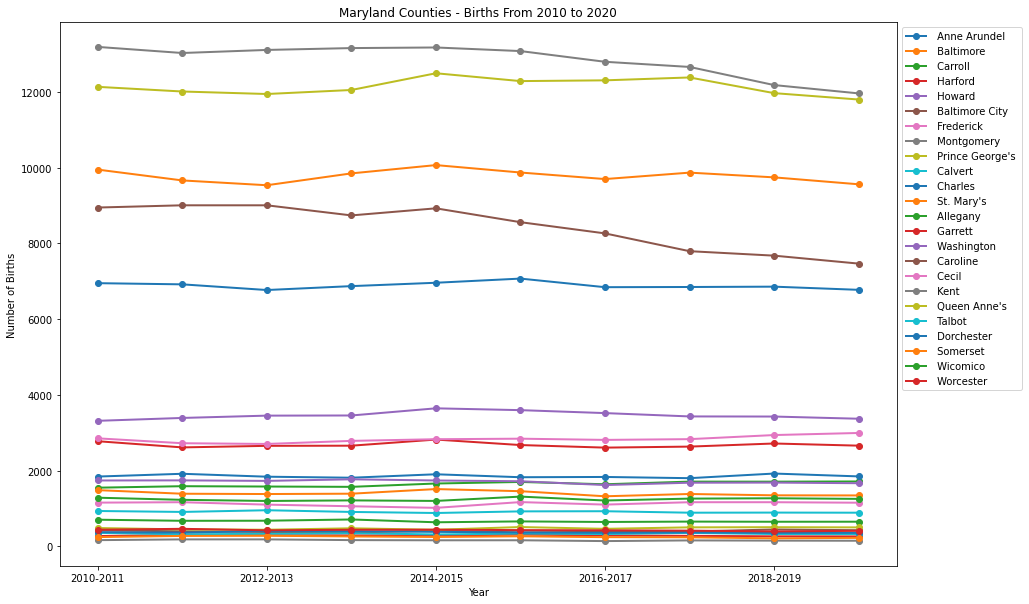


---------------------------------------------------

Maryland Census: Employment


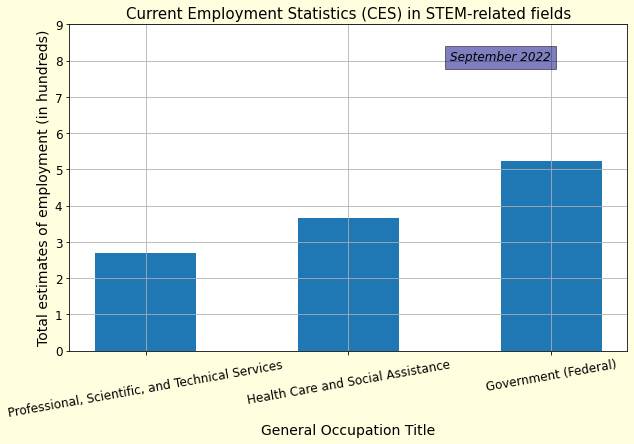

Word Cloud


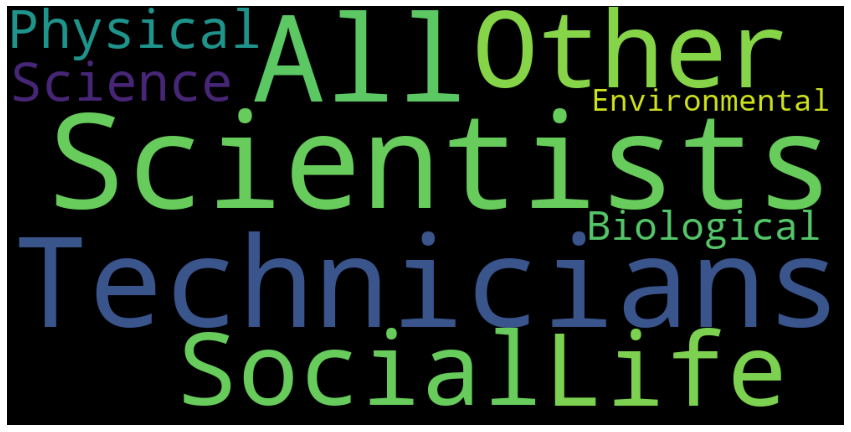

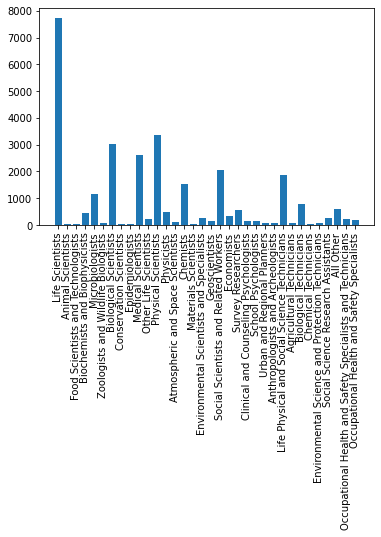


---------------------------------------------------

Maryland Census: Ethnicities


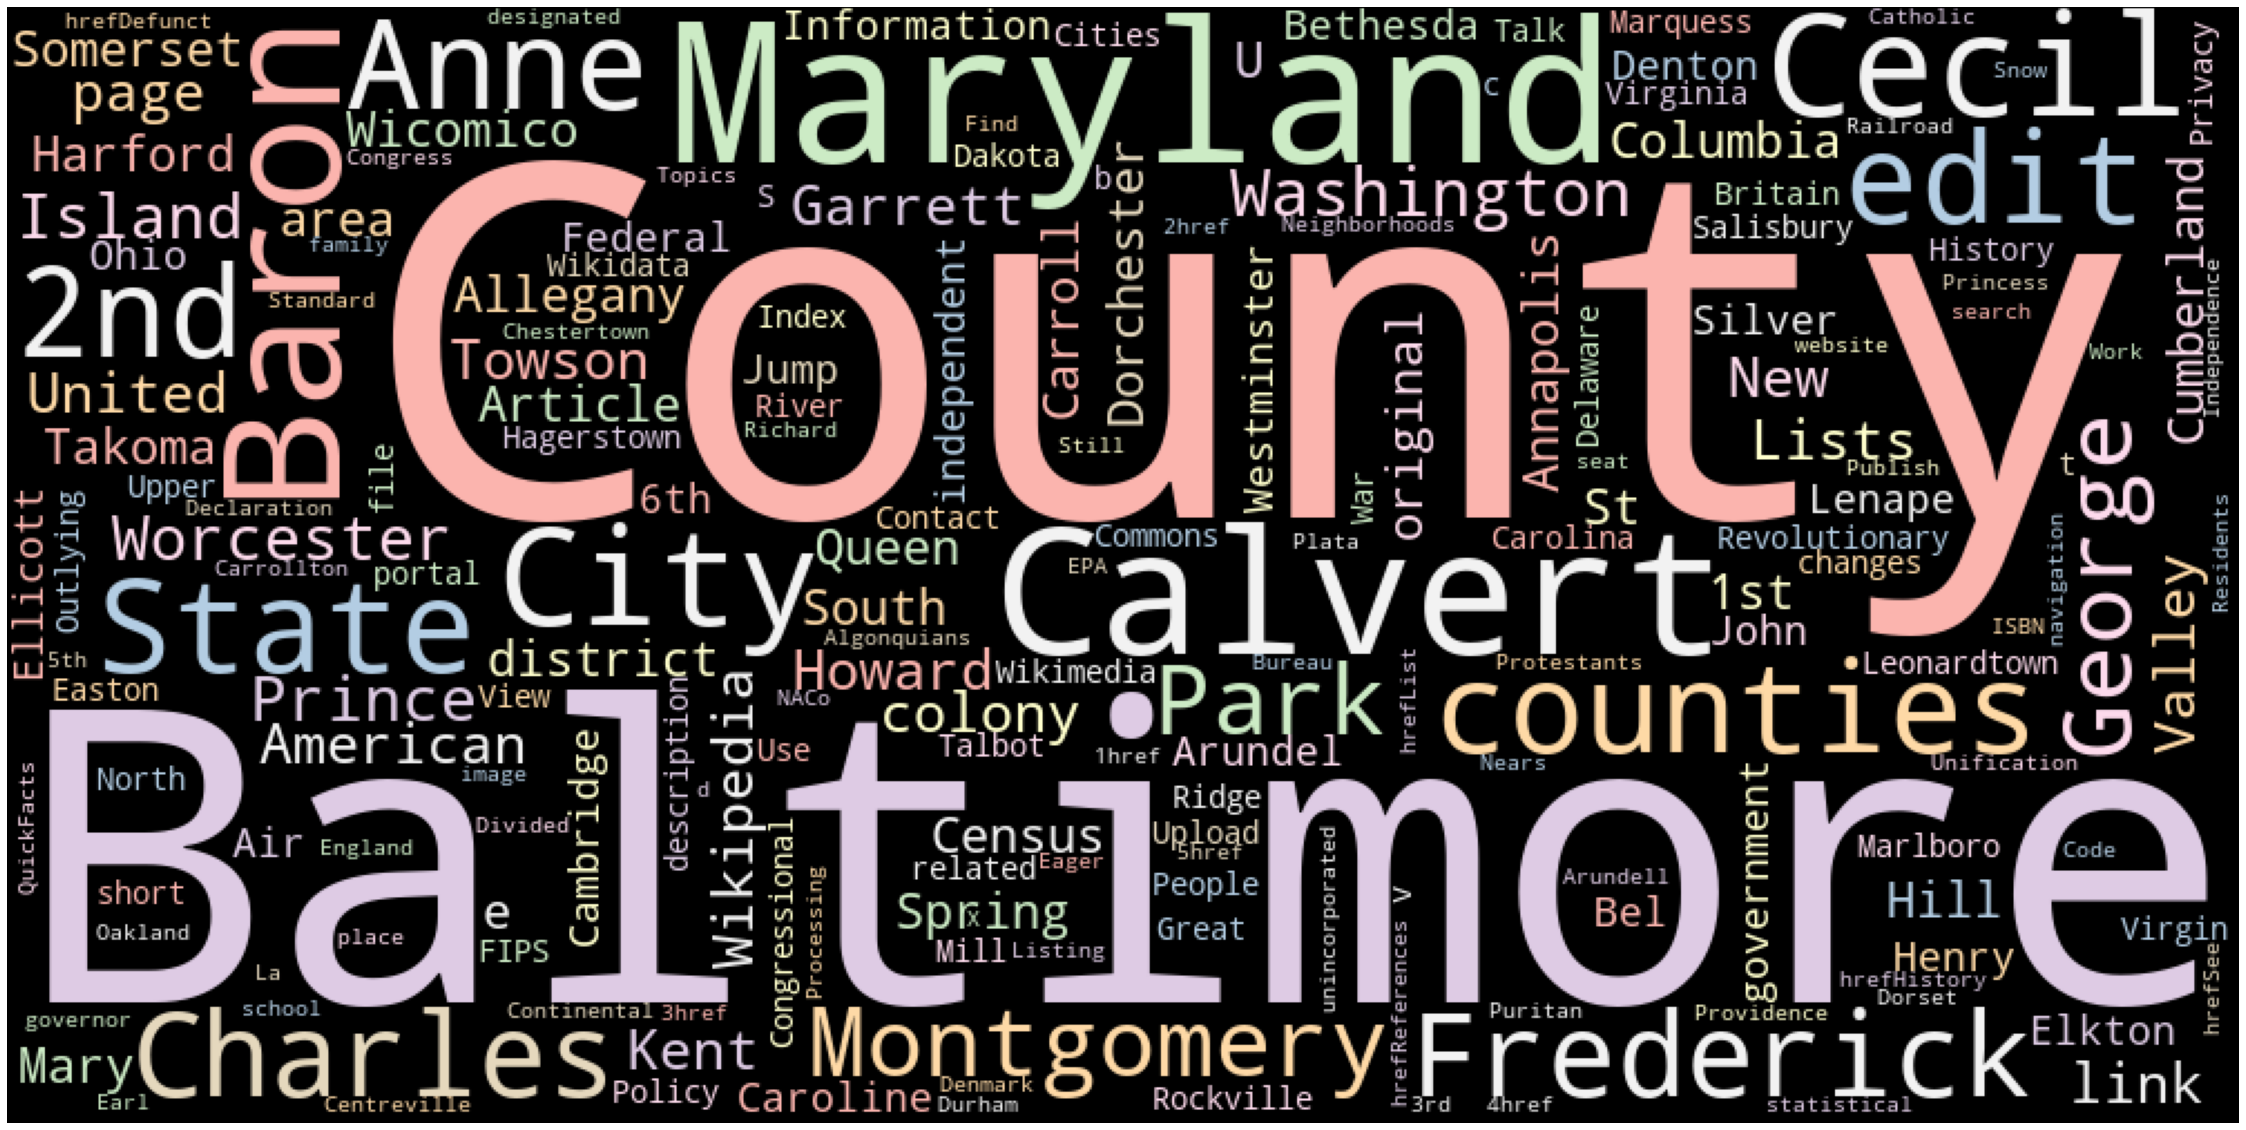

In [ ]:
#@title ##MARYLAND CENSUS MAIN()
main_function()